<a href="https://colab.research.google.com/github/faisaladisoe/image-processing-lab/blob/master/Lab%202/source%20code/Lab2_1906293184_MuhammadFaisalAdiSoesatyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, util, exposure, filters, morphology
from scipy import fftpack as fp

# Import Helper

In [2]:
from helper import *

# Task 1

## Importing image

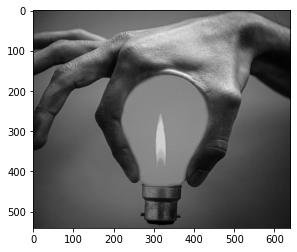

In [3]:
lamp_image = color.rgb2gray(io.imread('./images/lamp.jpg'))
plt.imshow(lamp_image, cmap = 'gray')
plt.show()

## Show image in frequency domain

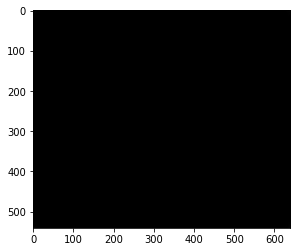

In [4]:
fft = fp.fft2(lamp_image)
plt.imshow(abs(fft), cmap = 'gray');
plt.show()

### Calculate magnitude

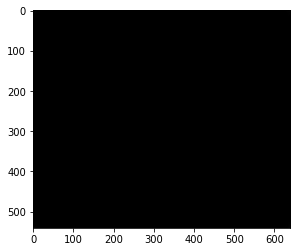

In [5]:
ft_norm = abs(fft)
plt.imshow(ft_norm, cmap = 'gray');
plt.show()

### Scale image

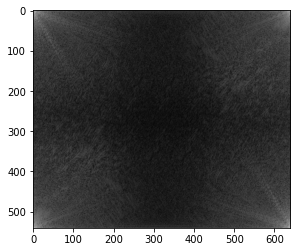

In [6]:
ft_scale = np.log(1 + ft_norm)
plt.imshow(ft_scale, cmap = 'gray');
plt.show()

### Shift image

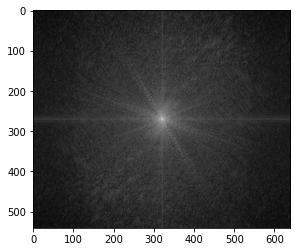

In [7]:
ft_shift = fp.fftshift(ft_scale)
plt.imshow(ft_shift, cmap = 'gray');
plt.show()

### Reverse fft image

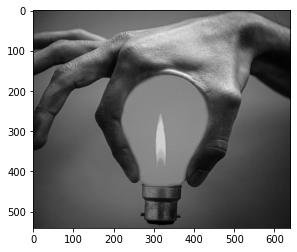

In [8]:
ift = fp.ifft2(fft).real
plt.imshow(abs(ift), cmap='gray');
plt.show()

## Show image in spatial & frequency domain from low pass filter 

### Computation

In [33]:
# Count width & length
w, l = paddedsize(lamp_image.shape[0], lamp_image.shape[1])

# create ideal & butterworth lowpass filter
ideal = lpfilter('ideal', w, l, .05 * w)
butterworth = lpfilter('btw', w, l, .05 * w)

# count fft image
fft_ideal = fp.fft2(lamp_image, (w, l))

# apply low-pass ideal & butterworth filter
LPFS_ideal_image = ideal * fft_ideal
LPFS_btw_image = butterworth * fft_ideal

# calculate IDFT for spatial domain
LPF_ideal_image = fp.ifft2(LPFS_ideal_image).real
LPF_btw_image = fp.ifft2(LPFS_btw_image).real

LPF_ideal_image = LPF_ideal_image[:lamp_image.shape[0], :lamp_image.shape[1]]
LPF_btw_image = LPF_btw_image[:lamp_image.shape[0], :lamp_image.shape[1]]

# shifting
fourier_spectrum = fp.fftshift(fft_ideal)
fourier_spectrum_display_ideal = fp.fftshift(LPFS_ideal_image)
fourier_spectrum_display_btw = fp.fftshift(LPFS_btw_image)

# scaling
scaling_1 = np.log(1 + abs(fourier_spectrum))
scaling_2_ideal = np.log(1 + abs(fourier_spectrum_display_ideal))
scaling_2_btw = np.log(1 + abs(fourier_spectrum_display_btw))

### Show result

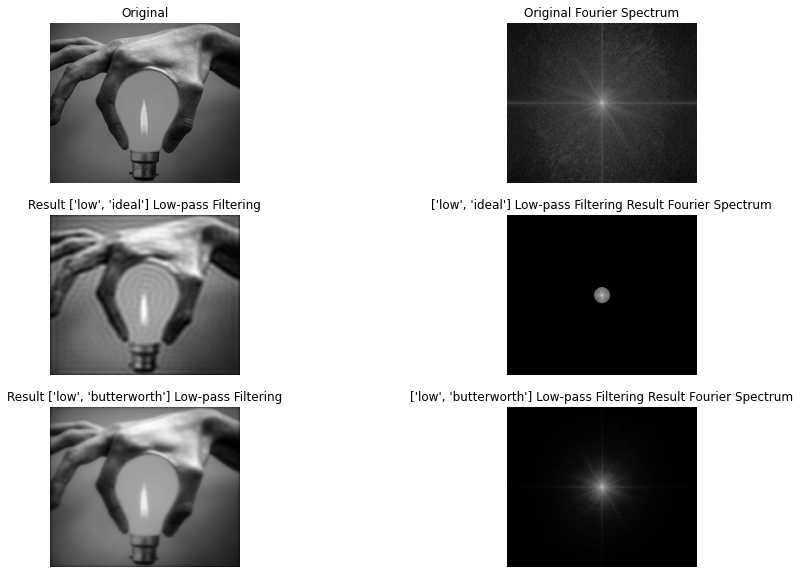

In [34]:
plt.figure(figsize=(15, 10))

# Show image
plt.subplot(3,2,1); plt.imshow(lamp_image, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(3,2,2); plt.imshow(scaling_1, cmap='gray')
plt.title("Original Fourier Spectrum")
plt.axis("off")

plt.subplot(3,2,3); plt.imshow(LPF_ideal_image, cmap='gray')
plt.title("Result ['low', 'ideal'] Low-pass Filtering")
plt.axis("off")

plt.subplot(3,2,4); plt.imshow(scaling_2_ideal, cmap='gray')
plt.title("['low', 'ideal'] Low-pass Filtering Result Fourier Spectrum")
plt.axis("off")

plt.subplot(3,2,5); plt.imshow(LPF_btw_image, cmap='gray')
plt.title("Result ['low', 'butterworth'] Low-pass Filtering")
plt.axis("off")

plt.subplot(3,2,6); plt.imshow(scaling_2_btw, cmap='gray')
plt.title("['low', 'butterworth'] Low-pass Filtering Result Fourier Spectrum")
plt.axis("off")

plt.show()

### Difference between butterworth & ideal in low pass filter

#### Ideal
1.   Citra pada spatial domain terlihat blur serta nampak terdapat 'wave effect' pada sekitar cahaya lilin serta disekitar jari tsb.
2.   Citra pada frequency domain terlihat lebih terpusat serta memiliki jari-jari yang konstan di setiap posisinya. Serta nampak tidak terdapat titik lain selain titik pusat.
3.   Bentuk jari pada gambar tsb terlihat masih cukup tajam, namun tidak dengan shadow light dari lilinnya, terlihat cukup blur apabila dibandingkan dengan butterworth.

#### Butterworth
1.   Citra pada spatial domain terlihat memiliki blur yang merata pada setiap objeknya, namun secara kualitas jauh lebih rapih dan halus ketimbang ideal filtering. Serta tidak nampak 'wave effect' di sekitar objeknya.
2.   Citra pada frequency domain terlihat memiliki cahaya yang terpencar dari sekitar titik pusatnya. Seolah-olah hal tsb adalah benda yang memancarkan cahaya. Hal ini berbeda dengan ideal filtering yang memiliki jari-jari yang konstan.
3.   Pada spatial domain, hasil citra terasa lebih nyaman untuk dilihat karena tidak merusak komposisi warna yang ada, serta lebih preserve objek yang ada.



## Show image in spatial & frequence domain from high pass filter

### Computation

In [43]:
# Count width & length
w, l = paddedsize(lamp_image.shape[0], lamp_image.shape[1])

# create ideal & butterworth lowpass filter
ideal = hpfilter('ideal', w, l, .05 * w)
butterworth = hpfilter('btw', w, l, .05 * w)

# count fft image
fft_ideal = fp.fft2(lamp_image, (w, l))

# apply low-pass ideal & butterworth filter
LPFS_ideal_image = ideal * fft_ideal
LPFS_btw_image = butterworth * fft_ideal

# calculate IDFT for spatial domain
LPF_ideal_image = fp.ifft2(LPFS_ideal_image).real
LPF_btw_image = fp.ifft2(LPFS_btw_image).real

LPF_ideal_image = LPF_ideal_image[:lamp_image.shape[0], :lamp_image.shape[1]]
LPF_btw_image = LPF_btw_image[:lamp_image.shape[0], :lamp_image.shape[1]]

# shifting
fourier_spectrum = fp.fftshift(fft_ideal)
fourier_spectrum_display_ideal = fp.fftshift(LPFS_ideal_image)
fourier_spectrum_display_btw = fp.fftshift(LPFS_btw_image)

# scaling
scaling_1 = np.log(1 + abs(fourier_spectrum))
scaling_2_ideal = np.log(1 + abs(fourier_spectrum_display_ideal))
scaling_2_btw = np.log(1 + abs(fourier_spectrum_display_btw))

### Show result

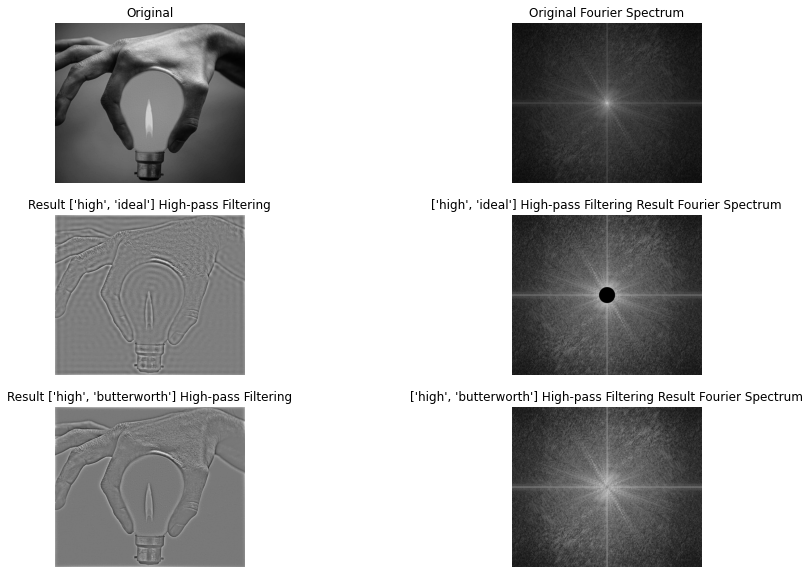

In [44]:
plt.figure(figsize=(15, 10))

# Show image
plt.subplot(3,2,1); plt.imshow(lamp_image, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(3,2,2); plt.imshow(scaling_1, cmap='gray')
plt.title("Original Fourier Spectrum")
plt.axis("off")

plt.subplot(3,2,3); plt.imshow(LPF_ideal_image, cmap='gray')
plt.title("Result ['high', 'ideal'] High-pass Filtering")
plt.axis("off")

plt.subplot(3,2,4); plt.imshow(scaling_2_ideal, cmap='gray')
plt.title("['high', 'ideal'] High-pass Filtering Result Fourier Spectrum")
plt.axis("off")

plt.subplot(3,2,5); plt.imshow(LPF_btw_image, cmap='gray')
plt.title("Result ['high', 'butterworth'] High-pass Filtering")
plt.axis("off")

plt.subplot(3,2,6); plt.imshow(scaling_2_btw, cmap='gray')
plt.title("['high', 'butterworth'] High-pass Filtering Result Fourier Spectrum")
plt.axis("off")

plt.show()

### Difference between butterworth & ideal in high pass filter

#### Ideal
1.   Citra pada spatial domain nampak seolah-olah merupakan hasil edge detection, namun dengan latar grey. Cukup terlihat dengan jelas edge dari objek yang ada pada gambar. Hal ini didukung dengan tidak terlihatnya detail dari objek tsb.
2.   Citra pada frequency domain terlihat seperti terjadi gerhana. Seolah-olah seperti pusat cahaya terhalang objek, sehingga memunculkan efek gelap pada benda yang menghalangi tsb.

#### Butterworth
1.   Citra pada spatial domain masih terlihat detail dari masing-masing objek yang terdapat pada gambar tsb. Berbeda dengan ideal filtering yang sudah tidak terlihat detailnya, tersisa edge dari masing-masing objeknya. Nampak seolah-olah gambar biasa yang ditampilkan dengan efek grey yang cukup pekat.
2.   Citra pada frequency domain terlihat mirip seperti original spectrum, namun memiliki pancaran inti cahaya yang lebih lebar. Berbeda dari ideal filtering yang terdapat objek yang menghalangi pusat cahaya, pada butterworth hal ini tidak ada.



## Effect of D0 in part (b, low-pass filter) and (c, high-pass filter)

### low-pass filter
1.   Pada percobaan D0 = .1 terlihat bahwa pada citra spatial domain, baik pada ideal maupun butterworth menampilkan citra yang hampir mirip seperti original image. Alias nampak seperti tidak ada perubahan apapun pada citranya. Namun pada butterworth memang nampak sedikit buram hasil citranya. Sedangkan pada citra frequency domain, pada ideal filtering terlihat memiliki jari-jari yang lebih besar ketimbang pada D0 = .05 sedangkan pada butterworth juga nampak memiliki pancaran cahaya yang lebih besar.
2.   Pada percobaan D0 = .01 terlihat bahwa pada citra spatial domain, baik pada ideal maupun butterworth keduanya sama-sama menampilkan citra yang sangat blur. Terutama pada ideal filtering, hampir sulit untuk diidentifikasi objek apa yang ada didalamnya. Sedangkan pada frequency domain, baik ideal maupun butterworth sama-sama memiliki jari-jari cahaya yang lebih kecil ketimbang saat D0 = .05.

Kesimpulan: Berdasarkan percobaan yang dilakukan di atas, dapat disimpulkan bahwa D0 berperan dalam penentuan kualitas citra yang dihasilkan baik pada spatial maupun frequency domain. Pada spatial berperan untuk menentukan blur level, sedangkan pada frequency berperan dalam menentukan ukuran jari-jari cahaya yang terpancar dari centre dot.

### high-pass filter
1.   Pada percobaan D0 = .1 terlihat bahwa pada citra spatial domain, pada ideal filtering sudah tidak terlihat lagi objeknya. Alias menghilang dibalik latar grey, sedangkan pada butterworth masih terlihat objek bahkan dengan detail dari objek tsb. Sedangkan pada frequency domain, ideal filtering memiliki objek hitam penghalang yang lebih besar daripada D0 = .05; pada butterworth nampak tidak ada bedanya dibandingkan dengan D0 = .05, namun sepertinya ukuran dari black dots kini nampak sedikit lebih besar dari D0 = .05
2.   Pada percobaan D0 = .01 terlihat bahwa pada citra spatial domain, pada ideal filtering hasil citra nampak lebih tajam. Terlihat dari munculnya efek hitam pada objek yang membuat seolah-olah citra lebih tajam. Sedangkan pada butterworth nampak seperti tidak ada bedanya dengan original image, hanya dengan efek dan latar grey saja. Sedangkan dari sisi frequency domain, pada ideal filtering ukuran benda penghalang sumber cahaya sangat kecil, bahkan seperti dots. Sedangkan pada butterworth filtering tidak terlihat black dot sama sekali. Hanya cahaya dengan pancarannya yang lebih lebar ketimbang original image.

Kesimpulan: Berdasarkan percobaan yang dilakukan di atas, dapat disimpulkan bahwa D0 memiliki efek pada high-pass filtering berupa penentuan apakah citra yang dihasilkan pada spatial domain ingin tetap preserve detail dari objek, termasuk edge atau tidak. Semakin besar D0nya, maka detail dari objek semakin hilang, vice-versa. Sedangkan pada frequency domain berperan untuk penentuan ukuran dari benda penghalang sumber cahaya. Semakin besar D0 maka benda penghalang sumber cahaya (black dot) semakin besar, vice-versa.


# Task 2

## Importing image

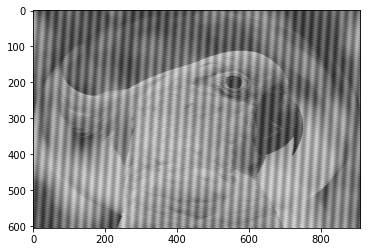

In [13]:
noisy_bird_image = io.imread('./images/noisy_bird.jpg')
plt.imshow(noisy_bird_image, cmap = 'gray')
plt.show()

## Show image in frequency domain

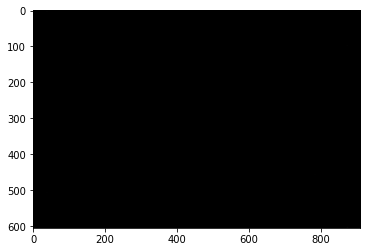

In [14]:
fft_nb = fp.fft2(noisy_bird_image)
plt.imshow(abs(fft_nb), cmap = 'gray');
plt.show()

### Calculate magnitude

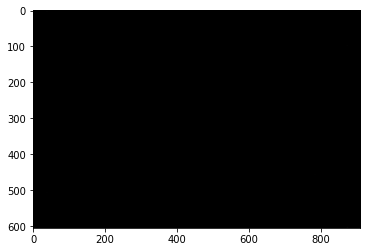

In [15]:
ft_norm_nb = abs(fft_nb)
plt.imshow(ft_norm_nb, cmap = 'gray');
plt.show()

### Scale image

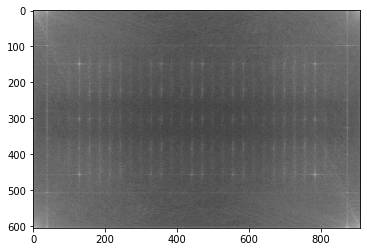

In [16]:
ft_scale_nb = np.log(1 + ft_norm_nb)
plt.imshow(ft_scale_nb, cmap = 'gray');
plt.show()

### Shift image

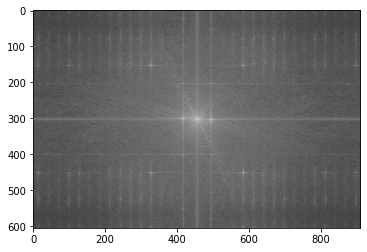

In [17]:
ft_shift_nb = fp.fftshift(ft_scale_nb)
plt.imshow(ft_shift_nb, cmap = 'gray');
plt.show()

### Reverse fft image

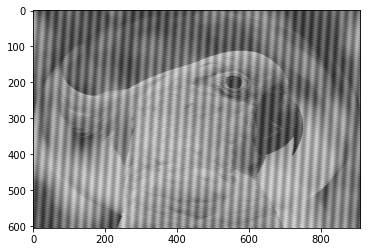

In [18]:
ift_nb = fp.ifft2(fft_nb).real
plt.imshow(abs(ift_nb), cmap='gray');
plt.show()

## Do filtering

### Calculation

In [47]:
# Count width and length
w, l = paddedsize(noisy_bird_image.shape[0], noisy_bird_image.shape[1])
print(w, l)

# Calculate DFT
fft_bird_image = fp.fft2(util.img_as_float(noisy_bird_image), (w, l))

# Scaling & Shifting
fourier_shifting_bird = fp.fftshift(fft_bird_image)
scaling_1_bird = np.log(1 + abs(fourier_shifting_bird))

1210 1820


### Show result

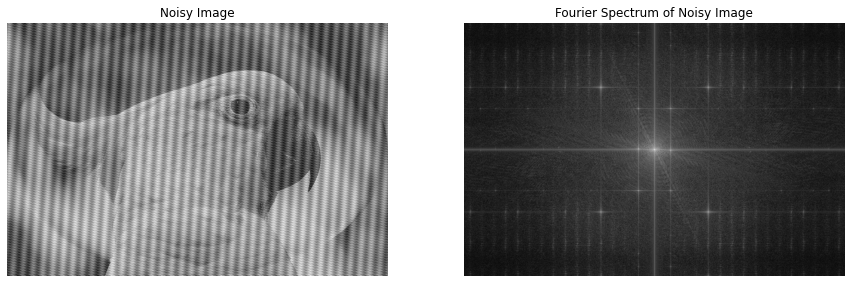

In [80]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1); plt.imshow(noisy_bird_image, cmap='gray')
plt.title('Noisy Image'); 
plt.axis("off")

plt.subplot(1,2,2); plt.imshow(scaling_1_bird, cmap='gray')
plt.title('Fourier Spectrum of Noisy Image');
plt.axis("off")

plt.show()

### Apply Notch Filter

In [77]:
# Get points
# centre = (900, 600)
H_outer_left_top = notch('btw', w, l, 40, -255, -300)
H_outer_left_bottom = notch('btw', w, l, 40, -255, 300)
H_outer_right_top = notch('btw', w, l, 40, 260, -300)
H_outer_right_bottom = notch('btw', w, l, 40, 260, 300)

H_inner_left_top = notch('btw', w, l, 40, -75, -200)
H_inner_left_bottom = notch('btw', w, l, 40, -75, 200)
H_inner_right_top = notch('btw', w, l, 40, 80, -200)
H_inner_right_bottom = notch('btw', w, l, 40, 80, 200)

H_inner_left_mid = notch('btw', w, l, 40, -75, -2)
H_inner_right_mid = notch('btw', w, l, 40, 80, 2)

# Apply notch filter
FS_bird_btw = fft_bird_image * H_outer_left_top * H_outer_left_bottom * H_outer_right_top * H_outer_right_bottom * H_inner_left_top * H_inner_left_bottom * H_inner_right_top * H_inner_right_bottom * H_inner_right_mid * H_inner_left_mid

# Calculate IDFT for spatial domain transformation
F_bird_btw = fp.ifft2(FS_bird_btw).real
F_bird_btw = F_bird_btw[:noisy_bird_image.shape[0], :noisy_bird_image.shape[1]]

# Scaling & Shifting for fourier spectrum display
Fcf = fp.fftshift(FS_bird_btw)
scaling_2_bird = np.log(1 + abs(Fcf))

### Show result

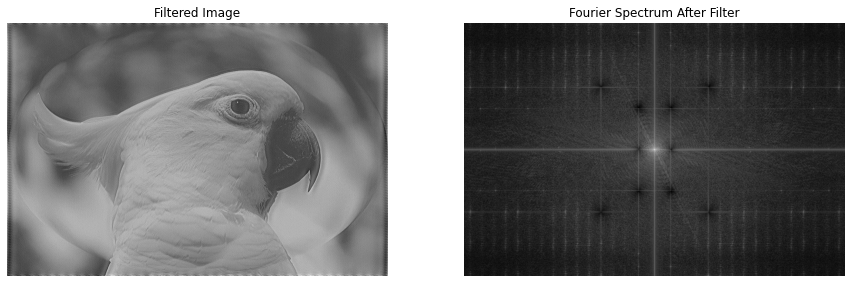

In [78]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1); plt.imshow(F_bird_btw, cmap='gray')
plt.title('Filtered Image')
plt.axis("off")

plt.subplot(1,2,2); plt.imshow(scaling_2_bird, cmap='gray')
plt.title('Fourier Spectrum After Filter')
plt.axis("off")
plt.show()

### Reason

Alasan saya menggunakan notch filtering adalah karena saat saya apply fourier transform pada noisy image, terlihat pada frequency domain terdapat multiple dots selain centre dot. Hal ini yang menjadi pemantik dan dasar landasan saya menggunakan notch filtering. Dikarenakan notch filtering memungkinkan saya untuk 'menutup' dots di luar centre dot agar noise pada image dapat dihilangkan.

## Show image before and after filtering in spatial & frequency domain

### Before Filtering

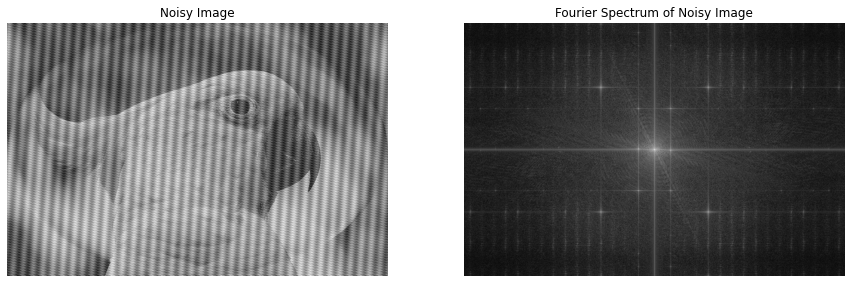

In [82]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1); plt.imshow(noisy_bird_image, cmap='gray')
plt.title('Noisy Image'); 
plt.axis("off")

plt.subplot(1,2,2); plt.imshow(scaling_1_bird, cmap='gray')
plt.title('Fourier Spectrum of Noisy Image');
plt.axis("off")

plt.show()

### After Filtering

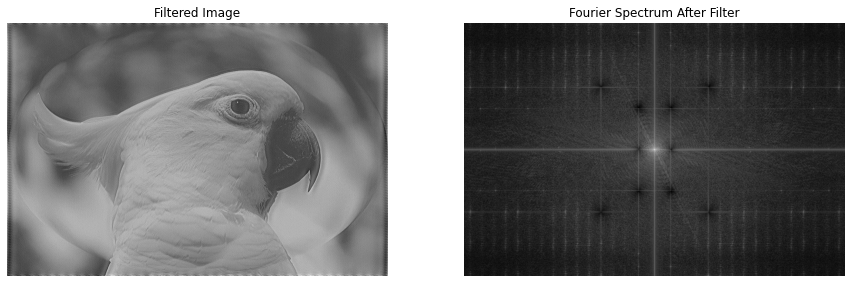

In [81]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1); plt.imshow(F_bird_btw, cmap='gray')
plt.title('Filtered Image')
plt.axis("off")

plt.subplot(1,2,2); plt.imshow(scaling_2_bird, cmap='gray')
plt.title('Fourier Spectrum After Filter')
plt.axis("off")
plt.show()

### Explanation

Berdasarkan adjustment dan komputasi yang saya lakukan pada noisy image di atas, dapat dilihat bahwa image after filtering menjadi jauh lebih baik dan jernih. Band noise sudah hilang dari image, yang tersisa hanyalah 'magnify effect' pada object parrot. Hal ini saya lakukan dengan menerapkan notch filtering pada dots selain centre dot pada fourier spectrum. Notch filtering ini sangat sensitive pada dots, terlihat bahwa terdapat 10 dots yang harus ditangani. Apabila dots yang ditangani tidak mencapai 10, hasil image masih nampak terdapat band noise. Saya melakukan eksperimen dengan hanya menutup 8 dari 10 dots, hasil citranya adalah image lebih tajam & jernih namun band noise masih tetap ada. 